# Data Mining Lab 2       `(Clustaring)`

## KMeans Algorithm

### About the Data That I will Use 
#### The Data Columns Are :-
 - CustomerID
 - Gender
 - Age
 - Annual Income
 - spending Score

# Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Reading The data

In [27]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

   `There is no null values in The data`

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [31]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Changing Columns Name

In [32]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_score'} , inplace= True)

In [33]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_score'], dtype='object')

In [34]:
df.drop(columns=['CustomerID'], axis= 1, inplace= True)

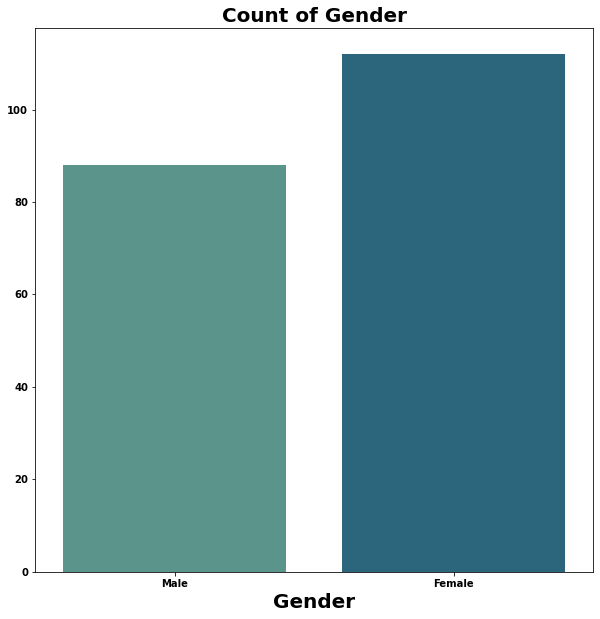

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'Gender', data =df, palette='crest')
plt.title('Count of Gender', fontsize = 20, fontweight = 'bold')
plt.xlabel('Gender',fontsize = 20, fontweight = 'bold')
plt.ylabel('')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold');

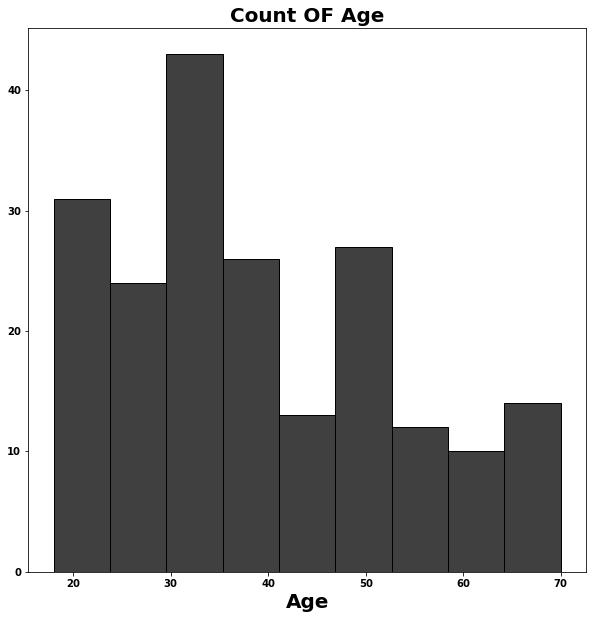

In [36]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'Age', data = df, color= 'Black')
plt.title('Count OF Age', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age',fontsize = 20, fontweight = 'bold')
plt.ylabel('')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show();

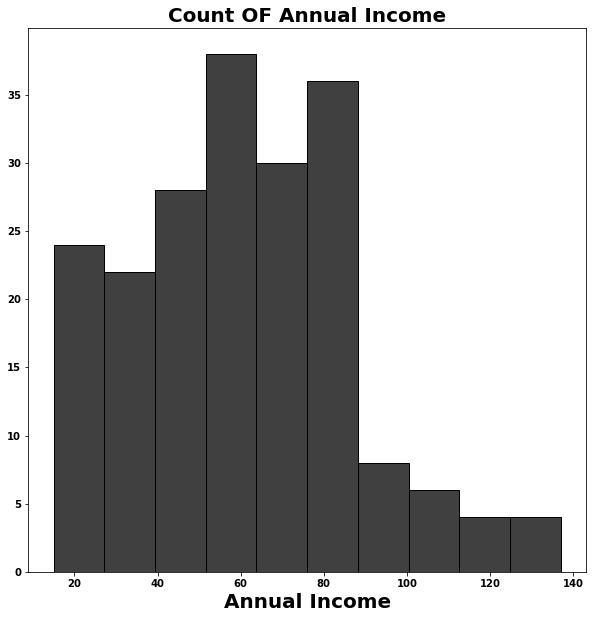

In [37]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'Annual_Income', data = df, color= 'Black')
plt.title('Count OF Annual Income', fontsize = 20, fontweight = 'bold')
plt.xlabel('Annual Income',fontsize = 20, fontweight = 'bold')
plt.ylabel('')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show();

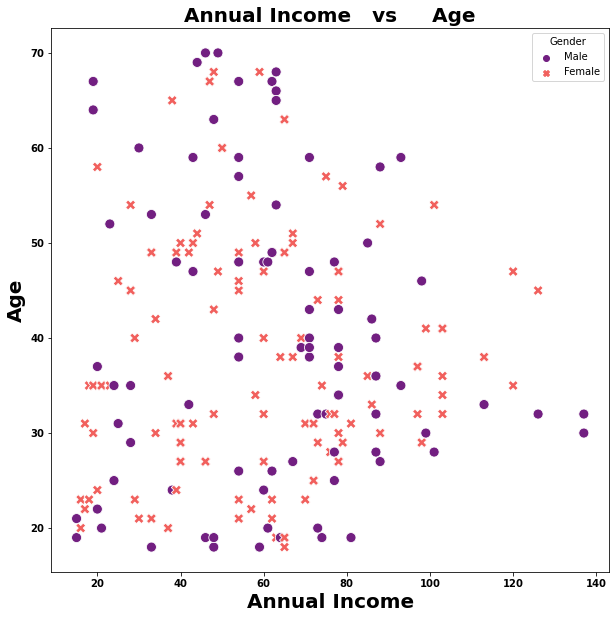

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Annual_Income',y= 'Age', data = df, hue= 'Gender',s = 100, style= 'Gender', palette='magma')
plt.title('Annual Income   vs     Age', fontsize = 20, fontweight = 'bold')
plt.xlabel('Annual Income',fontsize = 20, fontweight = 'bold')
plt.ylabel('Age' , fontsize = 20, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show();

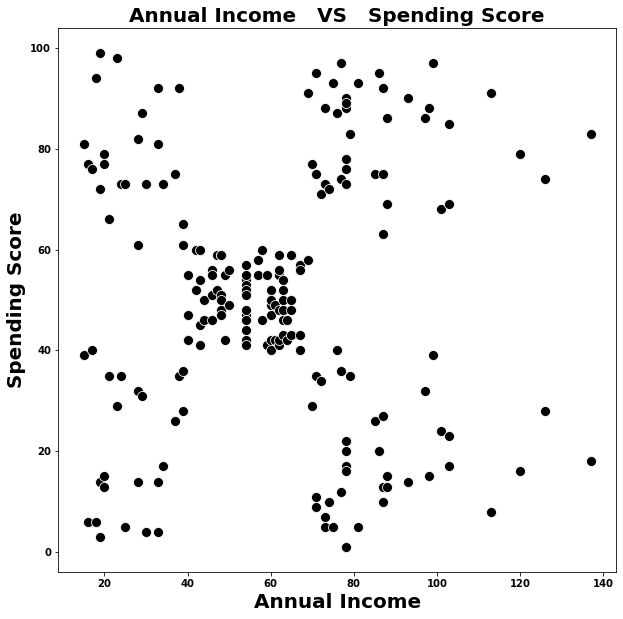

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Annual_Income',y= 'Spending_score', data = df, s = 100, color = 'Black')
plt.title('Annual Income   VS   Spending Score', fontsize = 20, fontweight = 'bold')
plt.xlabel('Annual Income',fontsize = 20, fontweight = 'bold')
plt.ylabel('Spending Score' , fontsize = 20, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show();

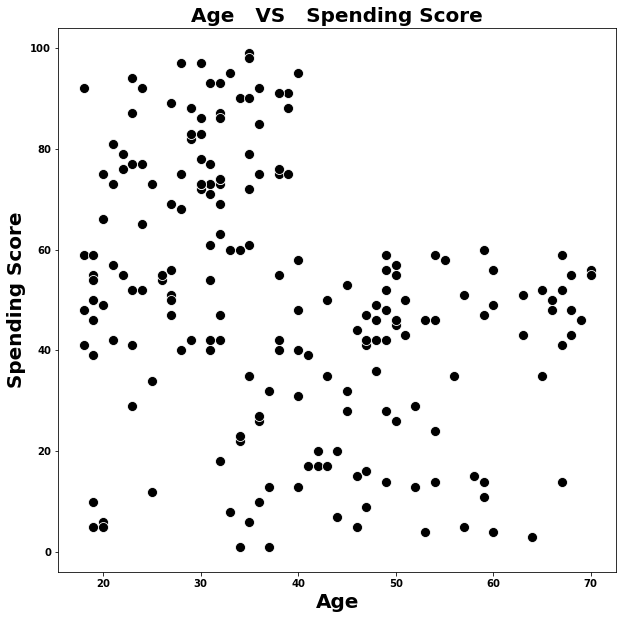

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Age',y= 'Spending_score', data = df, s = 100, color = 'Black')
plt.title('Age   VS   Spending Score', fontsize = 20, fontweight = 'bold')
plt.xlabel('Age',fontsize = 20, fontweight = 'bold')
plt.ylabel('Spending Score' , fontsize = 20, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.show();

In [41]:
pre_data = df[['Annual_Income','Spending_score']].values
pre_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [42]:
pre_data.shape

(200, 2)

## scaling The Data 

In [43]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pre_data)
scaled_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Clustering The data BY KMeans Algorithm

In [44]:
km = KMeans(n_clusters= 5,init='k-means++', n_init='auto' ,random_state= 16)
predict_y = km.fit_predict(scaled_data)

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
predict_y

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [46]:
km.inertia_

65.56840815571681

In [47]:
pre_data[predict_y == 0]

array([[15, 39],
       [16,  6],
       [17, 40],
       [18,  6],
       [19,  3],
       [19, 14],
       [20, 15],
       [20, 13],
       [21, 35],
       [23, 29],
       [24, 35],
       [25,  5],
       [28, 14],
       [28, 32],
       [29, 31],
       [30,  4],
       [33,  4],
       [33, 14],
       [34, 17],
       [37, 26],
       [38, 35],
       [39, 36],
       [39, 28]], dtype=int64)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

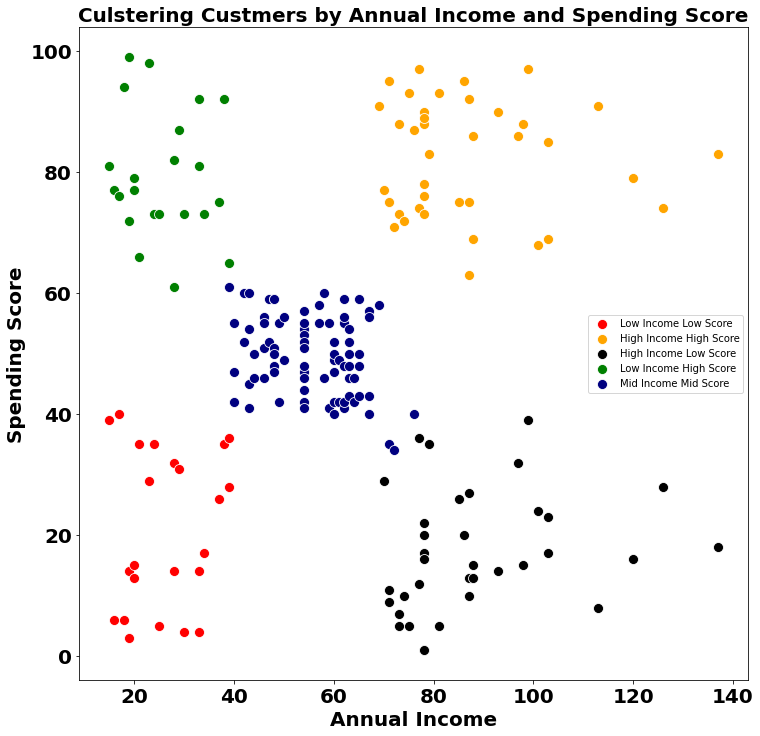

In [48]:
plt.figure(figsize=(12,12))
sns.scatterplot(pre_data[predict_y == 0,0], pre_data[predict_y == 0,1], s=100, color = 'red', label = 'Low Income Low Score')
sns.scatterplot(pre_data[predict_y == 1,0], pre_data[predict_y == 1,1], s=100, color = 'Orange', label = 'High Income High Score')
sns.scatterplot(pre_data[predict_y == 2,0], pre_data[predict_y == 2,1], s=100, color = 'Black', label = 'High Income Low Score')
sns.scatterplot(pre_data[predict_y == 3,0], pre_data[predict_y == 3,1], s=100, color = 'Green', label = 'Low Income High Score')
sns.scatterplot(pre_data[predict_y == 4,0], pre_data[predict_y == 4,1], s=100, color = 'Navy', label = 'Mid Income Mid Score')
plt.title('Culstering Custmers by Annual Income and Spending Score', fontsize = 20, fontweight = 'bold')
plt.xlabel('Annual Income', fontsize = 20, fontweight = 'bold')
plt.ylabel('Spending Score', fontsize = 20, fontweight = 'bold')
plt.xticks(fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 20, fontweight = 'bold')
plt.show();

## Elbow Method

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

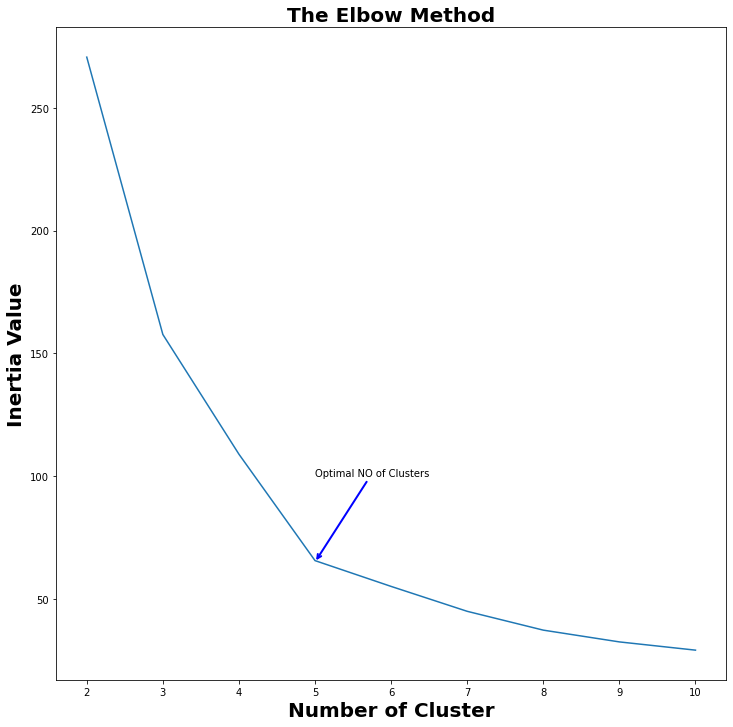

In [49]:
inertias = []
clusters_number = range(2,11)
for i in clusters_number:
    km = KMeans(n_clusters= i, init= 'k-means++', random_state= 16)
    km.fit(scaled_data)
    inertias.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12,12))
sns.lineplot(x= clusters_number, y= inertias, ax=ax)
plt.title('The Elbow Method', fontsize= 20, fontweight = 'bold')
plt.xlabel('Number of Cluster', fontsize= 20, fontweight = 'bold')
plt.ylabel('Inertia Value', fontsize= 20, fontweight = 'bold')


ax.annotate('Optimal NO of Clusters', xy = (5,65), xytext= (5,100), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

# After finishing the Clustring I added The Prediction to The DataFrame To use it in Classification Algorithm

In [50]:
new_dataframe = df.copy()

In [51]:
new_dataframe['customer_class'] = predict_y

In [53]:
new_dataframe

,Gender,Age,Annual_Income,Spending_score,customer_class
0,Male,19,15,39,0
1,Male,21,15,81,3
2,Female,20,16,6,0
3,Female,23,16,77,3
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,2


In [54]:
new_dataframe.to_csv('cluster_customer.csv')